Name: Anastassiya Luzinsan

Email: a.luzinsan@innopolis.university


---



## Assignment 1: The value iteration algorithm

Your task is to solve the Robot Cleaning problem using the Value Iteration algorithm.

1- Based on your understanding write down the pseudo-code for Value Iteration algorithm.

2- Complete the implementation for value iteration algorithm. Basically you need to only complete the `MDP.state_utility()` method, comment on your results.

3- Make sure to provide your detailed explanation for the result.

4- Explain in detail the results you got in comparison with the Policy Iteration algorithm in your own words based on your understanding.


**Note:** Your grade will be based on your understanding of the algorithm and your analysis to the results. Cheating will be punished by nullifying.



### 1. The pseudo-code for Value Iteration algorithm 

$$Q{(s,a)} = \ R{(s,a)} + \gamma \color{red}{\max_{a^\prime}} \sum_{s^\prime\in\text{S}} \big[P{(s^\prime|s,a)}  Q{(s^\prime,a^\prime)}\big]$$

```preuso-code
Initialize U(s) arbitrarily for all states s (e.g., U(s)=0)
Repeat:
    delta <- 0
    For each state s in S:
        old <- U(s)
        U(s) <- R(s) + gamma * max_a { sum over s' [P(s' | s, a) * U(s')] }
        delta <- max(delta, |old - U(s)|)
Until delta < ε * (1 - gamma)/gamma
Return U

```

Here, for every state, we update its utility (value) using a one-step lookahead backup (a “full-width backup”) which uses the Bellman optimality equation. This method does not separately evaluate a policy - instead, it updates the value function by choosing the best (greedy) action in each step.

In [4]:
%cd /home/luzinsan/Innopolis/Innopolis/2 semester/Reinforcement_Learning_and_Intellectual_Agents/Labs/assig1

/home/luzinsan/Innopolis/Innopolis/2 semester/Reinforcement_Learning_and_Intellectual_Agents/Labs/assig1


/home/luzinsan/Innopolis/Innopolis/2 semester/Reinforcement_Learning_and_Intellectual_Agents/Labs/rl/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MDP:
  def __init__(self):
        #Starting state vector
        #The agent starts from (1, 1)
        self.states = np.array([[0.0, 0.0, 0.0, 0.0,
                                    0.0, 0.0, 0.0, 0.0,
                                    1.0, 0.0, 0.0, 0.0]])
        self.rewards = np.array([-0.04, -0.04, -0.04,  +1.0,
                                 -0.04,   0.0, -0.04,  -1.0,
                                 -0.04, -0.04, -0.04, -0.04])
        self.num_states = 12

        # Probabilities Transition matrix loaded from file
        #(It is too big to write here)
        self.transits = np.load("T.npy")
        #Generate the first policy randomly
        # Nan=Nothing, -1=Terminal, 0=Up, 1=Left, 2=Down, 3=Right
        self.policy = np.random.randint(0, 4, size=(12)).astype(np.float32)
        self.policy[5] = np.nan
        self.policy[3] = self.policy[7] = -1

        #Utility vector
        self.values = np.array([0.0, 0.0, 0.0,  0.0,
                                0.0, 0.0, 0.0,  0.0,
                                0.0, 0.0, 0.0,  0.0])
        self.gamma = 0.999

        self.epsilon = 0.0001
        self.iteration = 0
  

    # In this function, we use a loop over the available actions. 
    # For each action, we compute the expected future utility 
    # by summing (or taking the dot product) the product 
    # of the transition probabilities from state s (for action a) 
    # and the current value estimates. 
    # Then, by choosing the maximum over actions, 
    # we effectively perform the “greedy improvement” step in one go 
    # - this is why value iteration is sometimes viewed as 
    # a form of policy iteration with only one step of policy evaluation (k = 1)
    
  def state_utility(self, s):
    """
    Return the updated utility for state s using the Bellman optimality equation.
    This method implements the one-step lookahead backup:
      U(s) <- R(s) + gamma * max_a { sum over s' [P(s' | s, a) * U(s')] }
    @return the utility of the state
    """
    # List to collect expected utilities for all actions in state s
    action_utilities = []
    # Loop over all possible actions (up, left, down, right)
    for a in range(4):
        # For current state s and action a, compute the expected utility:
        # Multiply the transition probabilities (for all possible next states) with their current values.
        expected_value = np.sum(self.transits[s, :, a] * self.values)
        action_utilities.append(expected_value)
    
    # Apply the Bellman update: add the immediate reward for s and the discounted best expected future utility.
    return self.rewards[s] + self.gamma * max(action_utilities)
  

  def expected_action(self):
      """Return the expected action.

      It returns an action based on the
      expected utility of doing a in state s,
      according to T and u. This action is
      the one that maximize the expected
      utility.

      @return expected action (int)
      """
      actions = np.zeros(4)
      for action in range(4):
        #Expected utility of doing a in state s, according to T and u.
        actions[action] = np.sum(np.multiply(self.values, np.dot(self.states, self.transits[:,:,action])))
      return np.argmax(actions)

def generate_graph(utility_list):
    """Given a list of utility arrays (one for each iteration)
       it generates a matplotlib graph and save it as 'output.jpg'
    """
    name_list = ('(1,3)', '(2,3)', '(3,3)', '+1', '(1,2)', '#', '(3,2)', '-1', '(1,1)', '(2,1)', '(3,1)', '(4,1)')
    color_list = ('cyan', 'teal', 'blue', 'green', 'magenta', 'black', 'yellow', 'red', 'brown', 'pink', 'gray', 'sienna')
    counter = 0
    index_vector = np.arange(len(utility_list))
    for state in range(12):
        state_list = list()
        for utility_array in utility_list:
             state_list.append(utility_array[state])
        plt.plot(index_vector, state_list, color=color_list[state], label=name_list[state])
        counter += 1
    #Adjust the legend and the axis
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.4), ncol=3, fancybox=True, shadow=True)
    plt.ylim((-1.1, +1.1))
    plt.xlim((1, len(utility_list)-1))
    plt.ylabel('Utility', fontsize=15)
    plt.xlabel('Iterations', fontsize=15)
    plt.savefig("./output.jpg", dpi=500)

def print_policy(p, shape):
    """Printing utility.

    Print the policy actions using symbols:
    ^, v, <, > up, down, left, right
    * terminal states
    # obstacles
    """
    counter = 0
    policy_string = ""
    for row in range(shape[0]):
        for col in range(shape[1]):
            if(p[counter] == -1): policy_string += " *  "
            elif(p[counter] == 0): policy_string += " ^  "
            elif(p[counter] == 1): policy_string += " <  "
            elif(p[counter] == 2): policy_string += " v  "
            elif(p[counter] == 3): policy_string += " >  "
            elif(np.isnan(p[counter])): policy_string += " #  "
            counter += 1
        policy_string += '\n'
    print(policy_string)


=================== FINAL RESULT ==================
Iterations: 22
Delta: 5.578678757833799e-08
Gamma: 0.999
Epsilon: 0.0001
[0.80796344 0.86539911 0.91653199 1.        ]
[ 0.75696624  0.          0.65836281 -1.        ]
[0.69968296 0.64882106 0.60471973 0.38150428]
 >   >   >   *  
 ^   #   ^   *  
 ^   <   <   <  



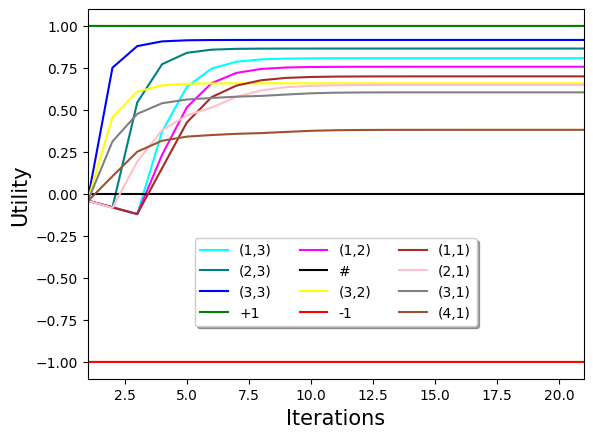

In [10]:
mdp = MDP()
#List containing the data for each iteation
graph_list = list()

while True:
    delta = 0
    # u = mdp.values
    u_old = mdp.values.copy()
    mdp.iteration += 1
    graph_list.append(u_old)
    for s in range(12):
        mdp.states = np.zeros((1,mdp.num_states))
        mdp.states[0,s] = 1.0
        mdp.values[s] = mdp.state_utility(s)
        u = mdp.values
        delta = max(delta, np.abs(u[s] - u_old[s])) #Stopping criteria
    if delta < mdp.epsilon * (1 - mdp.gamma) / mdp.gamma:
            print("=================== FINAL RESULT ==================")
            print("Iterations: " + str(mdp.iteration))
            print("Delta: " + str(delta))
            print("Gamma: " + str(mdp.gamma))
            print("Epsilon: " + str(mdp.epsilon))
            print("===================================================")
            print(u[0:4])
            print(u[4:8])
            print(u[8:12])
            print("===================================================")
            for ss in range(12):
              if not np.isnan(mdp.policy[ss]) and not mdp.policy[ss]==-1:
                  mdp.states = np.zeros((1,12))
                  mdp.states[0,ss] = 1.0
                  #2- Policy improvement
                  a = mdp.expected_action()
                  if a != mdp.policy[ss]: mdp.policy[ss] = a
            print_policy(mdp.policy, shape=(3,4))
            print("===================================================")

            break
generate_graph(graph_list)

The value function has converged to a stable set of utilities for each state.

Most states converge within about 8–20 iterations, reflecting that  $\lambda$ = 0.999 places high emphasis on future rewards, so states may need a slightly fewer iterations to settle

We can see distinct lines for the terminal states (+1 and −1), which remain constant from the start.

States in the top row converge to higher values since they are closer to the +1 terminal reward.

States near the bottom row end up with more modest (especially near the −1 terminal).

The obstacle state (#) is not updated and remains “unusable.”

Even though the plot and final table show the converged utilities, the optimal policy is obtained by choosing, in each non-terminal state, the action that leads to the highest expected utility (i.e., that yields the maximum of the Bellman backup).

The resulting policy will guide the agent around the obstacle and toward the +1 state, avoiding the −1 state unless forced or trapped.

### Compare to the policy iteration algorithm

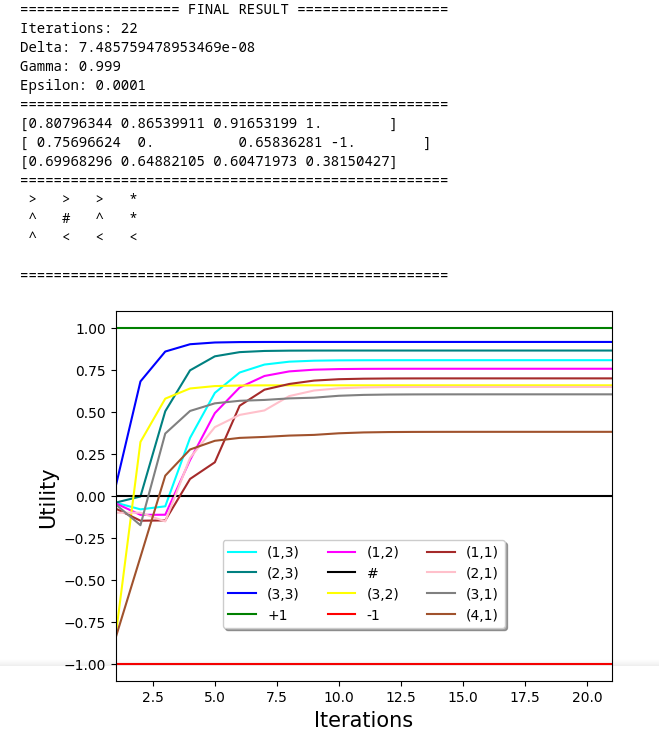

Both methods ultimately find the same optimal utilities, but they do so in slightly different ways:
- Value Iteration updates the utility estimates by taking the maximum Bellman backup at each step. It directly refines the value function for every state and uses a single “greedy” improvement on each iteration. This can lead to a faster per-iteration procedure but sometimes needs more iterations overall to settle.
- Policy Iteration alternates between Policy Evaluation (calculating the utilities for the current policy) and Policy Improvement (choosing a better action for each state). Each iteration is more “expensive” in the sense that it evaluates a policy fully, but it often converges in fewer total iterations.

On the plots, we can see that both methods converge to very similar curves for each state’s utility. Value Iteration’s lines tend to approach the final values more gradually, while Policy Iteration jumps more discretely each time the policy is improved. Ultimately, both yield the same optimal policy: states near the +1 terminal end up with higher utilities, and those near the −1 terminal end up with lower ones